# Data Quality Evaluation and Metrics
---
## Prototype: Data Label Noise Tolerant Methods in Tabular Data

© 2024 Baris Sen. All Rights Reserved.


In [ ]:
# Necessary installs

! pip install scikit-activeml
! pip install cleanlab

## AGENDA

1.   Introduction
2.   Literature Review
3.   Topic Modeling \
  3.1 Imports & Loading of Data \
  3.2 Preprocessing \
  3.3 Model Training \
  3.4 Interpretation   
  3.5 Conclusion
4.   Data Label Noise
5.   SOTA Methods in Data label noise work \
  5.1 Confident Learning - Cleanlab open source library \
    &emsp; 5.1.1 Regression Example in Grade DataSet\
    &emsp; 5.1.2 Binary Class Example in Brain Tumor Dataset\
    &emsp; 5.1.3 Multi Class - Financial Textual Dataset\
  5.2 Active Learning\
  &emsp; 5.2.1 Introduction\
  &emsp; 5.2.2 Application
6. Comparison between SOTA models
5. Further Contribution
6. Conclusion
7. References

## 1. Introduction

Improvements in performance of machine learning algorithms, architectures and models have been in focus in both academic and business sectors for the past decades.
Researchers and professionals alike aspired for a better understanding of underlying patterns in data, as well as better prediction capabilities for future outcomes and therefore better decision making.

While the development of more sophistiacted models, model tuning etc. to improve performance have been successful, breakthroughs often occur only after applying the right data to them (Zha et al., 2023). Without sufficient and clean data, the predictive potential of a model will remain limited and will result in not useful results, described as *Garbage In Garbage Out* (Rose & Fischer, 2011). For this reason, a shift in research towards a data centric approach developed in the past years. Quality data, thoughtful data management, and ethical considerations related to data are foundational elements for the success, fairness, and reliability of AI systems in a variety of domains. With this research field only becoming established throughout the last years, there is little to no structured documentation on papers and findings. With more and more articles and research being published in the field of Data Centric AI, a structured literature review is necessary.

## 2. Literature Review:

We carried out a Literature review in the field of Data Quality Evaluation and Metrics and have also covered a systematic review in the field of Data Quality Assessment and the methodologies developed since early years. We initially conducted the literature review by using keywords like 'Data Quality', 'Data Centric AI' etc. on Google scholar and in reputed journals of Data Analytics which gave us an idea about the research over the years in this area. Later we focused on publication in between the years 2016-2023, the most recent ones, in the journals ACM, VLDB, SIGMOD, EDBT, BTW, PACMMOD and CIDR. We have found 43 relevant papers so far. We found out a few topics like data fairness, label noise being recurrent ones in those papers, but in order to give a more structured outlook to our manual comparison, we decided to do Topic Modelling on these papers.

## 2.1 Gettting Additional Literature from Google Scholar

By using this method we can get the top cited resources from Google Scholar by using additional filters: https://github.com/WittmannF/sort-google-scholar


In [ ]:
#!pip install sortgs
#!pip install selenium

In [ ]:
from selenium import webdriver

driver=webdriver.Chrome()


SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /root/.cache/selenium/chrome/linux64/122.0.6261.94/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x56edd8aa5e93 <unknown>
#1 0x56edd879dce6 <unknown>
#2 0x56edd87d26fa <unknown>
#3 0x56edd87ce6ed <unknown>
#4 0x56edd881771c <unknown>
#5 0x56edd880ac53 <unknown>
#6 0x56edd87dbdb3 <unknown>
#7 0x56edd87dc77e <unknown>
#8 0x56edd8a6b7cb <unknown>
#9 0x56edd8a6f7e5 <unknown>
#10 0x56edd8a590e1 <unknown>
#11 0x56edd8a70372 <unknown>
#12 0x56edd8a3d1bf <unknown>
#13 0x56edd8a94488 <unknown>
#14 0x56edd8a94683 <unknown>
#15 0x56edd8aa5044 <unknown>
#16 0x7fc47e36cac3 <unknown>


In [ ]:
!sortgs "noise tolerent method" --startyear 2022 --endyear 2024

Running with the following parameters:
Keyword: noise tolerent method, Number of results: 100, Save database: True, Path: /content, Sort by: Citations, Plot results: False, Start year: 2022, End year: 2024, Debug: False
Loading next 10 results
Robot checking detected, handling with selenium (if installed)
Loading...
No success. The following error was raised:
WebDriver.__init__() got an unexpected keyword argument 'chrome_options'
Loading next 20 results
Robot checking detected, handling with selenium (if installed)
Loading...
No success. The following error was raised:
WebDriver.__init__() got an unexpected keyword argument 'chrome_options'
Loading next 30 results
Robot checking detected, handling with selenium (if installed)
Loading...
No success. The following error was raised:
WebDriver.__init__() got an unexpected keyword argument 'chrome_options'
Loading next 40 results
Robot checking detected, handling with selenium (if installed)
Loading...
No success. The following error was r

## 3. Topic Modeling

To aid the overall understanding of the field of Data Quality Evaluation Metrics, we first conduct an extensive literature review, resulting in 43 relevant publications chosen. We used the following keywords in our literature review:

Data Quality Assessment, Data Quality Framework, Data Quality Models, Data Quality Dimensions, Data Quality Measurement, Data Quality Criteria, Data Quality in AI/ML, Data Quality in Big Data, Data Validation Methods, Data Quality Tools, Data Profiling, Data Consistency, Data Accuracy, Data Completeness, Data Timeliness, Data Fairness, Data Quality Standards, Data Quality Best Practices, Data Provenance, Data Diversity,

While it is possible to identify some strong topics, it is still quite challenging to identify the strongest subtopics within the literature pool. Next we will implement a topic modeling analysis with LDA (Latent Dirichlet Allocation) to aid our qualitative assessment of the papers. We will then combine both methodologies to identify the strongest subtopics within our literature review. We will then select one of these topics as a main focus for the rest of this research paper.For now we will use the title, abstract and listed keywords to conduct our topic analysis.

### 3.1 Imports & loading of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
import spacy
import gensim
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from gensim.models import TfidfModel
import gensim.corpora as corpora
import numpy as np

import tensorflow as tf
import numpy as np
import pandas as pd

from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading of dataset
first_dataset = pd.read_csv('/content/drive/MyDrive/Topic_CSV.csv')
second_dataset = pd.read_csv('/content/drive/MyDrive/Topic2_CSV.csv')
data_papers = pd.concat([first_dataset, second_dataset], ignore_index=True, sort=False)
data_papers.head(3)

,Title,Abstract,Keywords
0,Proactively Screening Machine Learning Pipelin...,Software systems that learn from data with mac...,"provenance tracking, data validation, machine ..."
1,Demystifying Artificial Intelligence for Data ...,Data preparation -- the process of discovering...,"artificial intelligence, data preparation, fou..."
2,Data Cleaning: Overview and Emerging Challenges,Detecting and repairing dirty data is one of t...,"data cleaning, statistical cleaning, integrity..."


In [ ]:
# Dropping duplicates
data_papers = data_papers.drop_duplicates()
# Dropping instance that is identical to another, but had different keywords
data_papers = data_papers.drop([46])
data_papers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     43 non-null     object
 1   Abstract  42 non-null     object
 2   Keywords  35 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
data_papers.to_csv('/content/drive/MyDrive/Topic_CSV_final.csv')

In [ ]:
full_texts = pd.read_csv('/content/drive/MyDrive/Full_texts_2.csv',sep=';')

In [ ]:
search_string = "dqd"
filtered = full_texts['Full_Text'][full_texts['Full_Text'].str.contains(search_string, case=False, na=False)]
filtered

31    I. INTRODUCTION The purpose of customer relati...
Name: Full_Text, dtype: object

In [ ]:
full_texts.loc[31]

Title        Exploring the Impact of Data Quality on Busine...
Full_Text    I. INTRODUCTION The purpose of customer relati...
Name: 31, dtype: object

### 3.2 Preprocessing

In [ ]:
data_papers = data_papers.reset_index(drop=True)

In [ ]:
papers_2 = data_papers['Title'].fillna('') + data_papers['Abstract'].fillna('') + data_papers['Keywords'].fillna('') + full_texts['Full_Text'].fillna('')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_2 = papers_2.values.tolist()
data_words_2 = list(sent_to_words(data_2))

In [ ]:
# Creating bigram phrases
bigram_2 = gensim.models.Phrases(data_words_2, min_count=5, threshold=100)
bigram_mod_2 = gensim.models.phrases.Phraser(bigram_2)

# Creating trigram phrases --> This is not utilized right now!
trigram_2 = gensim.models.Phrases(bigram_2[data_words_2], threshold=100)
trigram_mod_2 = gensim.models.phrases.Phraser(trigram_2)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extending stopwords list here! --> These were identified in previous iterations of topic modeling
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['datum','data','maintain','also','make'])
stop_words.extend(['part','rent','programming','orchestrate','non','issue',''])

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams_2(texts):
    return [bigram_mod_2[doc] for doc in texts]

def make_trigrams_2(texts):
    return [trigram_mod_2[bigram_mod_2[doc]] for doc in texts]

In [ ]:
# Remove Stop Words
data_words_nostops_2 = remove_stopwords(data_words_2)

# Form Bigrams
data_words_bigrams_2 = make_bigrams_2(data_words_nostops_2)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_2 = lemmatization(data_words_bigrams_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [ ]:
# Create Dictionary
id2word_2 = corpora.Dictionary(data_lemmatized_2)

# Create Corpus
texts_2 = data_lemmatized_2

# Term Document Frequency
corpus_2 = [id2word_2.doc2bow(text) for text in texts_2]

tfidf_model = TfidfModel(corpus_2)
corpus_2 = tfidf_model[corpus_2]

In [ ]:
# Function that calculates coherence score for each LDA depending on n number of topics
def elbow_method_2(n):

    lda_model_2 = gensim.models.LdaMulticore(corpus=corpus_2,
                                       id2word=id2word_2,
                                       num_topics=n,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

    coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=data_lemmatized_2, dictionary=id2word_2, coherence='c_v')
    coherence_lda_2 = coherence_model_lda_2.get_coherence()

    return coherence_lda_2

LDA for 2 topics computed
LDA for 3 topics computed
LDA for 4 topics computed
LDA for 5 topics computed
LDA for 6 topics computed
LDA for 7 topics computed
LDA for 8 topics computed
LDA for 9 topics computed
LDA for 10 topics computed
LDA for 11 topics computed


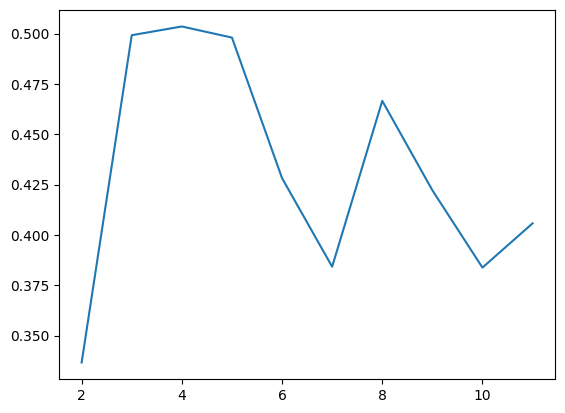

In [ ]:
# Define possible number of topics to iterate through
n_topics = [2,3,4,5,6,7,8,9,10,11]


scores = {}

for topics in n_topics:
    scores[topics] = elbow_method_2(topics)
    print(f'LDA for {topics} topics computed')

plt.plot(scores.keys(),list(scores.values()))

Text(0, 0.5, 'Coherence Score')

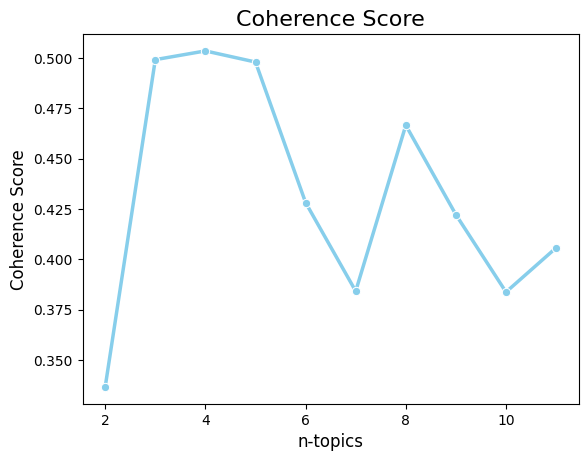

In [ ]:
import seaborn as sns

data = pd.DataFrame({'X': scores.keys(), 'Y': list(scores.values())})

sns.lineplot(data=data, x='X', y='Y', linewidth=2.5, color='skyblue', marker='o')

# Set titles and labels
plt.title('Coherence Score', fontsize=16)
plt.xlabel('n-topics', fontsize=12)
plt.ylabel('Coherence Score', fontsize=12)

While our maximum coherence score is achieved with 3 topics, the coherence score for an allocation of 5 models is very similar. A summary and grouping of these 5 topics into bigger, overarching topics will be done manually. Through this, we do want to avoid missing any vital topics within our analysis.

In [ ]:
scores_list = list(scores.values())

n_max_score = scores_list.index(max(scores_list))+2

# Custom number of topics
# n_max_score = 5

### 3.3 Training model

In [ ]:
# Build LDA model
lda_model_2 = gensim.models.LdaMulticore(corpus=corpus_2,
                                       id2word=id2word_2,
                                       num_topics=n_max_score,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
# Print keywords for each topic
pprint(lda_model_2.print_topics(num_words=15))

[(0,
  '0.001*"quantile" + 0.001*"balance_measure" + 0.001*"uncertainty" + '
  '0.000*"nwe" + 0.000*"variability" + 0.000*"resilience" + 0.000*"unfairness" '
  '+ 0.000*"balance" + 0.000*"distributed_representation" + '
  '0.000*"vulnerability" + 0.000*"welfare" + 0.000*"risk" + 0.000*"fairness" + '
  '0.000*"student" + 0.000*"bias"'),
 (1,
  '0.001*"pipeline" + 0.001*"noise" + 0.001*"repair" + 0.001*"coreset" + '
  '0.001*"cleaning" + 0.001*"clean" + 0.001*"label" + 0.000*"ontology" + '
  '0.000*"training" + 0.000*"fairness" + 0.000*"protected_group" + '
  '0.000*"axiom" + 0.000*"noisy" + 0.000*"cl" + 0.000*"rank"'),
 (2,
  '0.001*"anomaly_detection" + 0.001*"pipeline" + 0.001*"lattice" + '
  '0.001*"anomaly" + 0.001*"explanation" + 0.000*"query" + 0.000*"preparation" '
  '+ 0.000*"dqd" + 0.000*"labeler" + 0.000*"label" + 0.000*"image" + '
  '0.000*"repeated_labele" + 0.000*"worker" + 0.000*"novelty_detection" + '
  '0.000*"glc"'),
 (3,
  '0.001*"assessment" + 0.001*"fairness" + 0.001

In [ ]:
#Showing probability distribution of example document from our LDA model

document_index = 0
document = corpus_2[document_index]
topic_distribution = lda_model_2.get_document_topics(document)

print(f"Topic distribution for document {document_index}:")
for topic, prob in topic_distribution:
    print(f"Topic {topic}: Probability {prob:.4f}")

topic_with_highest_prob = max(topic_distribution, key=lambda x: x[1])
print()
print('highest probability: ',topic_with_highest_prob[1])

Topic distribution for document 0:
Topic 0: Probability 0.0324
Topic 1: Probability 0.0336
Topic 2: Probability 0.0329
Topic 3: Probability 0.9011

highest probability:  0.90107626


In [ ]:
# Allocating predicted topic to each document and the model's assessed probability that the document belongs to that respective topic

allocated_topic = []
probabilities = []

for i in range(len(corpus_2)):
    document = corpus_2[i]
    topic_distribution = lda_model_2.get_document_topics(document)

    topic_with_highest_prob = max(topic_distribution, key=lambda x: x[1])
    allocated_topic.append(topic_with_highest_prob[0])
    probabilities.append(topic_with_highest_prob[1])

# Displaying information in new table

topic_allocation = data_papers.copy()
topic_allocation['allocated_topic'] = allocated_topic
topic_allocation['probabilities'] = probabilities
topic_allocation.head(2)

,Title,Abstract,Keywords,allocated_topic,probabilities
0,Proactively Screening Machine Learning Pipelin...,Software systems that learn from data with mac...,"provenance tracking, data validation, machine ...",3,0.901035
1,Demystifying Artificial Intelligence for Data ...,Data preparation -- the process of discovering...,"artificial intelligence, data preparation, fou...",2,0.922546


(array([ 7.,  0.,  0., 11.,  0.,  0., 10.,  0.,  0., 15.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

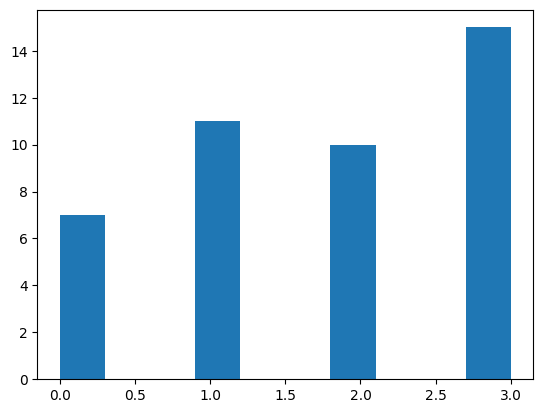

In [ ]:
# Showing distribution of documents assigned to respective topics

plt.hist(topic_allocation['allocated_topic'],width=0.3)

### 3.4 Interpretation

Our trained model has produced a clustering of the research papers into 5 topics. While the achieved coherence score of the final model allows for some certainty in the integrity of the topics, we will manually look at the selected words and the respective papers. Then, an overall strongest theme for each topic will be given manually.  

In [ ]:
def print_topic_and_paper(t):

    print(lda_model_2.print_topics(num_words=15)[t][1])
    print(f'no topics: {len(topic_allocation[topic_allocation["allocated_topic"]==t]["Title"])}')

    for title in topic_allocation[topic_allocation['allocated_topic']==t]['Title']:
        print('-------')
        print(title)

print_topic_and_paper(2)

NameError: name 'lda_model_2' is not defined

In [ ]:
lda_model_2.print_topics(num_words=15)[0][1]

'0.001*"quantile" + 0.001*"balance_measure" + 0.001*"uncertainty" + 0.000*"nwe" + 0.000*"variability" + 0.000*"resilience" + 0.000*"unfairness" + 0.000*"balance" + 0.000*"distributed_representation" + 0.000*"vulnerability" + 0.000*"welfare" + 0.000*"risk" + 0.000*"fairness" + 0.000*"student" + 0.000*"bias"'

**topic 0**: General Data Quality detection and preparation with pipelines(12) <br/>
**topic 1**: Dealing with label noise and data anomalies (6) <br/>
**topic 2**: Label quality and cleaning processes (8)<br/>
**topic 3**: Data Fairness (9)<br/>
**topic 4**: Managing of bias within data (8) <br/>

### 3.5 Conclusion

With the help of the LDA analysis, it is possible to define some prevalent topics within the presented literature review. Through this analysis, we found the following main topics:

**Data cleaning and preparation, often in the form of pipelines** <br/>
**Assessing and improving on label quality of data** <br/>
**Data Fairness and managing bias within datasets.**

The following paper will now focus on the second detected topic, assessing and improving on label quality of data. In our manual and LDA analysis, the topic of data label quality remains a strong subcategory for data quality metrics. Therefore, existing methods on label quality improvement will be assessed on new data and will be compared on their potential for further model improvements.  

## 4. Data Label Noise

When conducting a supervised learning algorithm, the model is trained on a set of training labels. With noisy data, a model's accuracy and therefore its performance gets reduced dramatically (Jiang, 2020). We will introduce methods that evaluate the quality of data labels. These quality metrics are then utilized to improve a model's performance without touching its architecture or hyperparameters. Other methodologies will improve on model performance in other ways related to label noise.

## 5. SOTA Methods in Data label noise work

## 5.1 Confident Learning - CleanLab:

<ins> What is Confident Learning? <ins>

Confident learning is a paradigm in machine learning that focuses on building models that are aware of and can handle noisy or mislabeled data. The main goal of confident learning is to improve the robustness and reliability of machine learning models, particularly in the presence of label noise.

Label noise occurs when there are errors or inaccuracies in the labeled training data, meaning that some instances are mislabeled. Traditional machine learning models can be sensitive to label noise and may produce suboptimal performance or be misled by incorrect labels.

Confident learning aims to address this challenge by incorporating uncertainty estimates into the learning process. Here are some key aspects of confident learning:

Confident Learning article: https://arxiv.org/pdf/1911.00068.pdf

<ins> Cleanlab: <ins>

Cleanlab is a statistical library that has been developed to assesss
data quality issues regarding data sets and address them and clean them. It is nominated as the most popular open source data centric - AI package in use at the moment. This statistical library has been mentioned by multiple articles in our literature review and practical applications have proven that it's model-agnostic nature for dealing with data quality helps improve model performace.

Cleanlab package supports text, image, and tabular datasets. In the next part of this notebook we will apply
the the `find_label_issues()` function of this library to investigate the label issues. We will apply this method in multiple domains of data and check the explainability and model performance built on this data.

In the last years there is also a user interface is developed for this library in order to provide no-code data quality assessment and data cleaning. (ref: https://help.cleanlab.ai/guide/quickstart/web/)

"CleanLearning fits multiple copies of our regression model via cross-validation and bootstrapping in order to compute predictions and uncertainty estimates for the dataset, which are used to identify label issues (i.e. likely corrupted y-values).

This method returns a Dataframe containing a label quality score (between 0 and 1) for each example in your dataset. Lower scores indicate examples more likely to be mislabeled with an erroneous y value. The Dataframe also contains a boolean column specifying whether or not each example is identified to have a label issue (indicating its y-value appears corrupted)."

https://github.com/cleanlab/cleanlab

These articles can be used:

1- https://github.com/cleanlab/cleanlab/blob/master/docs/source/tutorials/regression.ipynb

2- https://github.com/cleanlab/examples/blob/master/find_tabular_errors/find_tabular_errors.ipynb

3- Detecting Label Noise in Tabular Data: https://docs.cleanlab.ai/stable/tutorials/datalab/tabular.html

4- https://docs.cleanlab.ai/stable/tutorials/indepth_overview.html

5- https://github.com/cleanlab/examples

In [ ]:
import cleanlab
print(cleanlab.__version__)

1.0.1


In [ ]:
# Let's import our libraries
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import cleanlab
#from cleanlab.classification import CleanLearning
from cleanlab.regression.learn import CleanLearning as CleanLearning_reg
#from cleanlab.classification import LearningWithNoisyLabels
from cleanlab.benchmarking import noise_generation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

ModuleNotFoundError: No module named 'cleanlab.regression'

### 5.1.1 Regression Example in Grade DataSet:

In [ ]:
# Lets first try this library with one of the suggested data sets from cleanlab

train_data = pd.read_csv("https://s.cleanlab.ai/student_grades_r/train.csv")
test_data = pd.read_csv("https://s.cleanlab.ai/student_grades_r/test.csv")
train_data.head()

,exam_1,exam_2,exam_3,notes,final_score,true_final_score
0,72,81,80,NaN,73.3,73.3
1,89,62,93,NaN,83.8,83.8
2,97,0,94,NaN,73.5,73.5
3,80,76,96,missed class frequently -10,78.6,78.6
4,67,87,95,missed homework frequently -10,74.1,74.1


In [ ]:
feature_columns = ["exam_1", "exam_2", "exam_3", "notes"]
predicted_column = "final_score"

X_train_raw, y_train = train_data[feature_columns], train_data[predicted_column]
X_test_raw, y_test = test_data[feature_columns], test_data[predicted_column]

categorical_features = ["notes"]
X_train = pd.get_dummies(X_train_raw, columns=categorical_features)
X_test = pd.get_dummies(X_test_raw, columns=categorical_features)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_data(train_data, errors_idx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = train_data["exam_1"], train_data["exam_2"], train_data["exam_3"]
    labels = train_data["final_score"]

    img = ax.scatter(x, y, z, c=labels, cmap="jet")
    fig.colorbar(img)

    ax.plot(
        x.iloc[errors_idx],
        y.iloc[errors_idx],
        z.iloc[errors_idx],
        "x",
        markeredgecolor="black",
        markersize=10,
        markeredgewidth=2.5,
        alpha=0.8,
        label="Label Errors"
    )
    ax.legend()

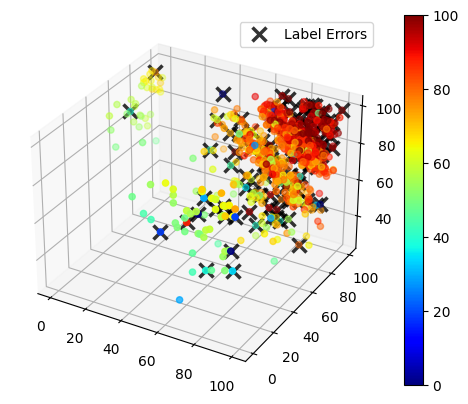

In [ ]:
errors_mask = train_data["final_score"] != train_data["true_final_score"]
errors_idx = np.where(errors_mask == 1)

plot_data(train_data, errors_idx)

In [ ]:
# baseline model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the objective for regression
    max_depth=3,  # Maximum depth of the tree
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    n_estimators=100  # Number of boosting rounds
)

In [ ]:
# fit & predict baseline model
xgb_model.fit(X_train, y_train)

preds_og = xgb_model.predict(X_test)
r2_og = r2_score(y_test, preds_og)
print(f"r-squared score of original model: {r2_og:.3f}")

r-squared score of original model: 0.867


In [ ]:
#xgb_model = xgb.XGBRegressor()
# baseline model wrapped in cleanlab
cl = CleanLearning_reg(xgb_model)

# lets apply cleanlab find label issues
label_issues = cl.find_label_issues(X_train, y_train)
label_issues[label_issues.is_label_issue==True]

ValueError: The classifier (clf) must define a .predict_proba() method.

In [ ]:
# fit & predict baseline model with cleanlab
cl.fit(X_train, y_train)

label_issues = cl.get_label_issues()

preds_cl = cl.predict(X_test)
r2_cl = r2_score(y_test, preds_cl)
print(f"r-squared score of cleanlab's model: {r2_cl:.3f}")

r-squared score of cleanlab's model: 0.911


We can already see in this example that:
- r-squared score of original model: 0.867
- r-squared score of cleanlab's model: 0.935

### 5.1.2 Binary Class Example in Brain Tumor Dataset

This dataset consists of Brain MRT images as well as tabular data descriptions of these images labeled with Brain Tumor or not.
We will first deal with the tabular data.

In [ ]:
# Replace 'YOUR_FOLDER_ID' with the actual folder ID from your shared link
#folder_id = '1-vUl8S62FJJBKYnJPdFYm2o3FHUpcqVb'

# Access the folder in Google Drive
folder_path = '/content/drive/MyDrive/SIS_23'

In [ ]:
brain_tumor_data = pd.read_csv(folder_path+'/braintumor.csv')
brain_tumor_data.shape

(3762, 15)

In [ ]:
brain_tumor_data.head(5)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
brain_tumor_data.columns

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [ ]:
brain_tumor_data.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [ ]:
feature_columns = ['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']
predicted_column = "Class"

X_train, X_test, y_train, y_test = train_test_split(brain_tumor_data[feature_columns], brain_tumor_data[predicted_column], test_size=0.2, random_state=42)

In [ ]:
#xgb_clf = xgb.XGBClassifier()
#xgb_clf.fit(X_train, y_train)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
#y_pred = xgb_clf.predict(X_test)
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [ ]:
# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       419
           1       0.99      0.95      0.97       334

    accuracy                           0.97       753
   macro avg       0.98      0.97      0.97       753
weighted avg       0.98      0.97      0.97       753



In [ ]:
from cleanlab.classification import CleanLearning

#xgb_clf_cleanlab = CleanLearning(clf=xgb.XGBClassifier())
log_reg_clean = CleanLearning(clf=LogisticRegression(max_iter=10000))

# Fit the model to the data (this will also clean the noisy labels)
#xgb_clf_cleanlab.fit(X_train, y_train)
log_reg_clean.fit(X_train, y_train)

# Predict with the trained model
#y_pred_cleaned = xgb_clf_cleanlab.predict(X_test)
y_pred_cleaned = log_reg_clean.predict(X_test)

# Evaluate the model on the cleaned test set
accuracy_cleaned = accuracy_score(y_test, y_pred_cleaned)
print(f"Accuracy on the cleaned test set: {accuracy_cleaned:.2f}")

# Display the classification report
print("Classification Report on the cleaned test set:\n", classification_report(y_test, y_pred_cleaned))

Accuracy on the cleaned test set: 0.97
Classification Report on the cleaned test set:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       419
           1       0.99      0.95      0.97       334

    accuracy                           0.97       753
   macro avg       0.98      0.97      0.97       753
weighted avg       0.97      0.97      0.97       753



We did not observe much increase in this data set with Cleanlab as probably dataset is already clean. Or maybe we need to play more with filters.

In [ ]:
# Lets now use the Braintumor data with synthetic error

In [ ]:
brain_tumor_synthnoise = pd.read_csv(folder_path+'/braintumor_w_syntheticnoise.csv')
brain_tumor_synthnoise.shape
brain_tumor_synthnoise['Class'] = brain_tumor_synthnoise['Class'].astype('int64')


# create X_train, X_test, y_train, y_test for noisy data
X_train, X_test, y_train, y_test = train_test_split(brain_tumor_synthnoise[feature_columns], brain_tumor_synthnoise[predicted_column], test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.77


 We can see that with the current noise the accuracy decreased from 0.97 to 0.77

In [ ]:
## Now let's apply the same prediction with cleanlab wrapped version

from cleanlab.classification import CleanLearning

#xgb_clf_cleanlab = CleanLearning(clf=xgb.XGBClassifier())
log_reg_clean = CleanLearning(clf=LogisticRegression(max_iter=10000))

# Fit the model to the data (this will also clean the noisy labels)
log_reg_clean.fit(X_train, y_train)

# Predict with the trained model
y_pred_cleaned = log_reg_clean.predict(X_test)

# Evaluate the model on the cleaned test set
accuracy_cleaned = accuracy_score(y_test, y_pred_cleaned)
print(f"Accuracy on the cleaned test set: {accuracy_cleaned:.2f}")

# Display the classification report
print("Classification Report on the cleaned test set:\n", classification_report(y_test, y_pred_cleaned))

Accuracy on the cleaned test set: 0.77
Classification Report on the cleaned test set:
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       396
           1       0.79      0.71      0.75       357

    accuracy                           0.77       753
   macro avg       0.78      0.77      0.77       753
weighted avg       0.77      0.77      0.77       753



We see an increase in accuracy from 0.77 to 0.78 but relatively small. However we can try to further optimize with cleanlab hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)

# Perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Create CleanLearning model with best hyperparameters
log_reg_clean = CleanLearning(clf=LogisticRegression(**best_params))

# Fit the model to the data (this will also clean the noisy labels)
log_reg_clean.fit(X_train, y_train)

# Predict with the trained model
y_pred_cleaned = log_reg_clean.predict(X_test)

# Evaluate the model on the cleaned test set
accuracy_cleaned = accuracy_score(y_test, y_pred_cleaned)
print(f"Accuracy on the cleaned test set: {accuracy_cleaned:.2f}")

# Display the classification report
print("Classification Report on the cleaned test set:\n", classification_report(y_test, y_pred_cleaned))

Accuracy on the cleaned test set: 0.79
Classification Report on the cleaned test set:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       396
           1       0.80      0.73      0.77       357

    accuracy                           0.79       753
   macro avg       0.79      0.79      0.79       753
weighted avg       0.79      0.79      0.79       753



We see a slight increase from 0.77 to 0.79 with grid search

In [ ]:
# let's also try with XGBoost

In [ ]:
# Create an XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


In [ ]:
# Create CleanLearning model with XGBoost as the base classifier
xgb_clf_cleanlab = CleanLearning(clf=xgb.XGBClassifier())

# Fit the model to the data (this will also clean the noisy labels)
xgb_clf_cleanlab.fit(X_train, y_train)

# Predict with the trained model
y_pred_cleaned = xgb_clf_cleanlab.predict(X_test)

# Evaluate the model on the cleaned test set
accuracy_cleaned = accuracy_score(y_test, y_pred_cleaned)
print(f"Accuracy on the cleaned test set: {accuracy_cleaned:.2f}")

Accuracy on the cleaned test set: 0.79


We see better increase in model performance with cleanlab in XGBoost

### 5.1.3 Multi Class - Financial Textual Dataset

We will further apply this library on this financial textual data set: https://www.kaggle.com/datasets/sulphatet/twitter-financial-news/data

### 5.1.3. Multi Class - CIFAR Image Dataset

In [ ]:
# This dataset just provides the respective labels with different levels of noise

data_cifar = np.load(folder_path+'/cifar-10-100n-main/data/CIFAR-10_human.npy',allow_pickle=True)
data_cifar = data_cifar.item()

In [ ]:
# All the different label spaces with diffrerent amounts of noise, we will use worse for now!
cifar_clean_label = np.array(data_cifar['clean_label']).reshape(-1, 1)
cifar_aggre_label = np.array(data_cifar['aggre_label']).reshape(-1, 1)
cifar_worse_label = np.array(data_cifar['worse_label']).reshape(-1, 1)
cifar_random_label1 = np.array(data_cifar['random_label1']).reshape(-1, 1)
cifar_random_label2 = np.array(data_cifar['random_label2']).reshape(-1, 1)

In [ ]:
# Training & test images can be imported through tensorflow -> Clean labels!

(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = cifar10.load_data()

In [ ]:
# Normalize pixel values for model and convert labels to one hot encoding

cifar_train_images, cifar_test_images = cifar_train_images / 255.0, cifar_test_images / 255.0

# Noisy training labels
cifar_train_labels = to_categorical(cifar_worse_label, 10)
# Clean testing labels
cifar_test_labels = to_categorical(cifar_test_labels, 10)

In [ ]:
# Create model architecture

# Create CNN model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers --> 10 class classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model odel summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Train base model with noisy data
history = model.fit(cifar_train_images, cifar_train_labels, epochs=10, validation_data=(cifar_test_images, cifar_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(cifar_test_images,cifar_test_labels)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4370 - accuracy: 0.4878 - val_loss: 1.4715 - val_accuracy: 0.4983
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2472 - accuracy: 0.5514 - val_loss: 1.4818 - val_accuracy: 0.5004
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1788 - accuracy: 0.5799 - val_loss: 1.5285 - val_accuracy: 0.4903
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1240 - accuracy: 0.6010 - val_loss: 1.5440 - val_accuracy: 0.4935
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0704 - accuracy: 0.6220 - val_loss: 1.6271 - val_accuracy: 0.4882
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0194 - accuracy: 0.6395 - val_loss: 1.6920 - val_accuracy: 0.4851
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9764 - accuracy: 0.6546 - val_loss: 1.7318 - val_accura

In [ ]:
# As another benchmark, the model is trained on the clean dataset --> Around 10% accuracy increase!

cifar_train_labels_clean = to_categorical(cifar_clean_label, 10)

history2 = model.fit(cifar_train_images, cifar_train_labels_clean, epochs=10, validation_data=(cifar_test_images, cifar_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(cifar_test_images,cifar_test_labels)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4409 - accuracy: 0.8430 - val_loss: 1.0504 - val_accuracy: 0.6918
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4171 - accuracy: 0.8525 - val_loss: 1.1328 - val_accuracy: 0.6868
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3946 - accuracy: 0.8587 - val_loss: 1.1562 - val_accuracy: 0.6888
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3766 - accuracy: 0.8656 - val_loss: 1.1931 - val_accuracy: 0.6858
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.3571 - accuracy: 0.8720 - val_loss: 1.2851 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3395 - accuracy: 0.8785 - val_loss: 1.2715 - val_accuracy: 0.6775
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3218 - accuracy: 0.8852 - val_loss: 1.3158 - val_ac

### 5.1.4. Multi Class - CIFAR Image Dataset - with CONFIDENT LEARNING

In [ ]:
! pip install cleanlab==1.0.1

In [ ]:
from cleanlab.pruning import get_noise_indices

In [ ]:
# predicted_probs = model.predict(cifar_train_images)

In [ ]:
# Define the parameters to search over
prune_methods = ['prune_by_class', 'prune_by_noise_rate', 'both']

# Initialize variables to store the best parameters and accuracy
best_params = {'prune_method': None}
best_accuracy = 0.0

# Nested loop for grid search
for prune_method in prune_methods:
    # Generate noisy labels using Cleanlab
    noisy_labels = get_noise_indices(
        s=cifar_train_labels.argmax(axis=1),
        psx=predicted_probs,
        prune_method=prune_method,
    )

    # Filter noisy samples in both images and labels
    cifar_train_images_noisy = cifar_train_images[noisy_labels]
    noisy_labels_categorical = np.eye(10)[cifar_train_labels.argmax(axis=1)][noisy_labels]


    # Train the CNN model with Cleanlab
    history_cleanlab = model.fit(cifar_train_images_noisy, noisy_labels_categorical, epochs=10, validation_data=(cifar_test_images, cifar_test_labels))

    # Evaluate the CNN model after Cleanlab
    _, test_acc_cleanlab = model.evaluate(cifar_test_images, cifar_test_labels)

    # Update the best parameters if the accuracy is improved
    if test_acc_cleanlab > best_accuracy:
        best_accuracy = test_acc_cleanlab
        best_params['prune_method'] = prune_method

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Best Test Accuracy:", best_accuracy * 100)

Epoch 1/10
500/500 [==============================] - 10s 19ms/step - loss: 1.3980 - accuracy: 0.6512 - val_loss: 4.8111 - val_accuracy: 0.2142
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 0.7932 - accuracy: 0.7697 - val_loss: 5.1668 - val_accuracy: 0.2148
Epoch 3/10
500/500 [==============================] - 3s 7ms/step - loss: 0.5692 - accuracy: 0.8280 - val_loss: 5.6353 - val_accuracy: 0.2142
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 0.4341 - accuracy: 0.8706 - val_loss: 5.8870 - val_accuracy: 0.2140
Epoch 5/10
500/500 [==============================] - 4s 7ms/step - loss: 0.3484 - accuracy: 0.8941 - val_loss: 6.2479 - val_accuracy: 0.2073
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.3017 - accuracy: 0.9068 - val_loss: 6.7033 - val_accuracy: 0.2106
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.2551 - accuracy: 0.9239 - val_loss: 7.1782 - val_accuracy: 0.2108
Epoc

## 5.2 Active Learning:



### 5.2.1 Introduction

Active Learning is a methodolgy that iteratively chooses what data it wants to be trained on (Settles, 2009). Usually an "oracle" provides a small sample of correct labels on the training data. Based on uncertainty and informativeness, further datapoints will be added to the training pool. At this point, these datapoints are unlabeled and will be labeled with the assigned labels from the original training data. Through this, "high quality labels are being prioritized before adding further data points that could increase noise. In a scenario where data labeling is particularly expensive, this could also help reduce the number of datapoints needed for training.
There are different sampling methods to select the next data point for training. In this section, we will focus on the greedy sampling target methodology, but might expand on this further in the future.

### 5.2.2 Application

In [ ]:
# Necessary imports

from skactiveml.pool import GreedySamplingX, GreedySamplingTarget, QueryByCommittee, \
    KLDivergenceMaximization
from sklearn.ensemble import BaggingRegressor
from skactiveml.regressor import NICKernelRegressor, SklearnRegressor
from skactiveml.utils import call_func, is_labeled
from scipy.stats import norm, uniform
from skactiveml.utils import unlabeled_indices, MISSING_LABEL
from skactiveml.regressor import SklearnRegressor

In [ ]:
# Initializing Regression model

xgb_model2 = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specify the objective for regression
    max_depth=3,  # Maximum depth of the tree
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    n_estimators=100  # Number of boosting rounds
)

# Implementing model in skactiveml wrapper
reg = SklearnRegressor(xgb_model2)

In [ ]:
# Specify sampling method
random_state = 0

qs = GreedySamplingTarget(random_state=random_state)
# qs = GreedySamplingX(random_state=random_state)

In [ ]:
# Specifying an empty label set for the training set
y = np.full_like(y_train, np.nan)
# Specifying one datapoint as known oracle label
y[0] = y_train[0]
y_true = y_train

In [ ]:
def get_ideal_dataset(n_iterations,X_train,X_test,y_test):

    high_score = 0
    n_iterations = 600
    counter = 0
    scores = []
    x_axis = []
    # Iterative process of adding further data points to the training set
    for i in range(n_iterations):
      reg.fit(X_train, y)
      indices, utils = call_func(qs.query,
        X=X_train,
        y=y,
        reg=reg,
        fit_reg=True,
        return_utilities=True,
                                )

      old_is_lbld = is_labeled(y)
      y[indices] = y_true[indices]
      is_lbld = is_labeled(y)

      y_pred= reg.predict(X_test)

      r2_al = r2_score(y_test, y_pred)

      scores.append(r2_al)
      x_axis.append(counter)
      counter +=1

      # Printing progress when the model performance is higher than the base model performance or if performance is improved
      if r2_al > 0.867:
        if r2_al > high_score:
          high_score = r2_al

          print(np.count_nonzero(~np.isnan(y)))
          print(r2_al)


    return [x_axis,scores]

In [ ]:
x_axis, scores = get_ideal_dataset(len(X_train),X_train,X_test,y_test)

153
0.8686576775648445
157
0.8777961586169383
436
0.8784164238350934
454
0.8801526690433797
477
0.888409775028598


(0.5, 1.0)

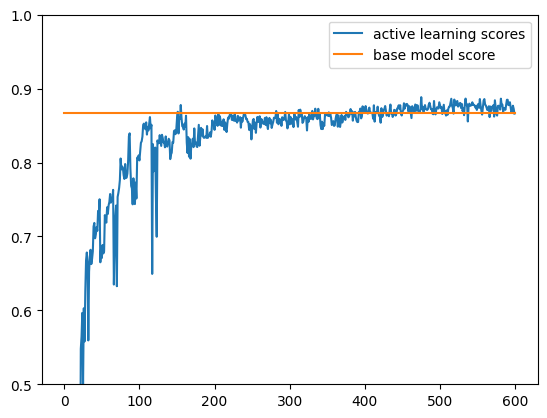

In [ ]:
sns.lineplot(x=x_axis, y=scores,label='active learning scores')

sns.lineplot(x=[0,600],y=[0.867,0.867],label='base model score')

plt.ylim(0.5, 1.0)

Our ideal test score of 0.886 is achieved with 550 data points. This means a significantly better score is possible while only training the model on 73% of the original training data.

### 5.2.2 CIFAR Active Learning

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

data_cifar = np.load(folder_path+'/cifar-10-100n-main/data/CIFAR-10_human.npy',allow_pickle=True)
data_cifar = data_cifar.item()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# change train_labels to specific noise level

clean_label = np.array(data_cifar['clean_label']).reshape(-1, 1)
aggre_label = np.array(data_cifar['aggre_label']).reshape(-1, 1)
worse_label = np.array(data_cifar['worse_label']).reshape(-1, 1)
random_label1 = np.array(data_cifar['random_label1']).reshape(-1, 1)
random_label2 = np.array(data_cifar['random_label2']).reshape(-1, 1)


# Convert labels to one-hot encoding
train_labels = to_categorical(worse_label, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# Create CNN model
def create_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense (fully connected) layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
import random
random_integers = random.sample(range(0, 50000), 500)

# Create Orcacle with 500 initial samples

oracle = train_images[random_integers]
oracle_labels = clean_label[random_integers]
oracle_labels = to_categorical(oracle_labels, 10)
worse_label = to_categorical(worse_label, 10)
clean_label = to_categorical(clean_label, 10)

In [ ]:
model_active = create_model()

# Train the model

history = model_active.fit(oracle, oracle_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model

test_loss, test_acc = model_active.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

In [ ]:
# Active learning loop
results = []

for _ in range(5):  # Replace with your desired number of active learning iterations

    # Query for labels using the current model
    pool_predictions = model_active.predict(train_images,verbose=0)
    uncertainty = np.max(pool_predictions, axis=1)  # You may use other uncertainty measures
    query_indices = np.argsort(uncertainty)[:500]  # Select the top 100 most uncertain samples

    # Label the selected samples (simulate oracle labeling)
    labeled_samples_X = train_images[query_indices]
    labeled_samples_y = worse_label[query_indices]

    # Add labeled samples to the training set
    oracle = np.vstack([oracle, labeled_samples_X])
    oracle_labels = np.vstack([oracle_labels, labeled_samples_y])

    # Remove labeled samples from the pool
    train_images = np.delete(train_images, query_indices, axis=0)
    worse_label = np.delete(worse_label, query_indices,axis=0)

    # Initiate new model
    model_active = create_model()

    # Retrain the model on the updated training set
    model_active.fit(oracle, oracle_labels, epochs=10, batch_size=32, validation_split=0.1,verbose=0)

    test_loss, test_acc = model_active.evaluate(test_images, test_labels,verbose=0)

    print('num_training_samples:',oracle.shape[0])
    print(test_acc)

    results.append([test_acc,oracle.shape[0]])


# Evaluate the final model

# test_accuracy = model.evaluate(X, y)[1]
# print(f'Final Test Accuracy: {test_accuracy}')

In [ ]:
metric = [row[0] for row in results]
n_samples = [row[1] for row in results]

In [ ]:
plt.plot(n_samples,metric)

## 6. Comparison between SOTA methods

### 6.1 Comparing Performance

As a base model for the cleanlab grades dataset, we implement an XGBRegressor model. Even on a noisy training set, this base model achieves a base score of 0.867 on the R2 metric.
We implement both, the cleanlab implementation of confident learning, as well as the active learning implementation in sklearn on the dataset.
Both methodologies are able to improve our base model score. The confident learning methodology achieved a score of 0.925, whereas the active learning method in its current state yields a score of 0.886.
Considering the R2 metric, confident learning is leading to significantly better results.

### 6.2 Comparing Noise detection

While ultimately, label noise methodologies should increase a model's performance, its original intention is to generate clean data with as much noise reduction as possible. To evaluate our methodologies on that metric, we will implement a scoring system on the generated datasets from our three methodologies. All data entries that remain in each final dataset after applying a methodology is a "Clean" prediction by the methodology. Every entry that has been omitted is a "Noisy" prediction by the methodology. As we use data that specifies whether a data entry is actually clean or noisy, we will be able to generate a confusion matrix from this binary classification problem. We will use these separate confusion matrices to compare the methodologies' ability to detect and eliminate noisy data.

## 7. Further Contribution

We would like to extend the application of the proposed methodologies on further data sets and various issues. (Tabular: Regression, Binary-MultiClass, Image, Text etc.)
We also want to define implement and benchmark further methodologies on label noise for a more extensive analysis. A standardized evaluation system will be proposed to be able to compare and rate the merit of these methodologies between one another.

There are ideas to contributing to current cleanlab open source library: https://github.com/cleanlab/cleanlab/wiki#ideas-for-contributing-to-cleanlab

One of them is the application on different data sources for benchmarking, which we are already showcasing in this notebook.

We will also elaborate more deeply on how our presented methodologies are solving the issue of noisy labels and what their shortcomings might be.


## 8. Conclusion

In this prototype we have conducted an extensive literature review on data quality evaluation metrics and data quality in general. Through topic modeling techniques, we were able to identify some major themes and sub-categories of data quality. One of these themes is label noise and label anomalies. In the context of this paper we will focus on this subarea.

We have conducted some analysis on two major methodologies on label noise in this notebook and have applied it on a novel dataset. For the work that follows, we will try to apply the 2 methods to datasets of various domains and seek the feasibility of the methods. A more expansive way of comparing the success of the data label noise methods will be created as well.


## 9. References

1. Northcutt, C.G., Jiang, L. and Chuang, I.L. (2022) Confident learning: Estimating uncertainty in dataset labels, arXiv.org. Available at: https://arxiv.org/abs/1911.00068 (Accessed: 30 November 2023)

2. Jiang, Lu. “Understanding Deep Learning on Controlled Noisy Labels.” Blog.research.google, 19 Aug. 2020, blog.research.google/2020/08/understanding-deep-learning-on.html.

3. Zha, D., Pervaiz Bhat, Z., Yang, F., Zaid, P., Bhat, K.-H., Lai, F., Yang, Z., Jiang, S., & Zhong, X. (2023). Data-centric Artificial Intelligence: A Survey. 2023. Data-Centric Artificial Intelligence: A Survey, 1(1), 39. https://arxiv.org/pdf/2303.10158.pdf <br/>


4. Rose, L. T., & Fischer, K. W. (2011). Garbage In, Garbage Out: Having Useful Data Is Everything. Measurement: Interdisciplinary Research & Perspective, 9(4), 222–226. https://doi.org/10.1080/15366367.2011.632338

5. Settles, B. (2009, January 9). Active learning literature survey. MINDS@UW Home. https://minds.wisconsin.edu/handle/1793/60660
